In [90]:
import numpy as np
import pandas as pd

df = pd.read_csv('/kaggle/input/cryptocurrencypricehistory/coin_Bitcoin.csv')
df.tail(120)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2742,2743,Bitcoin,BTC,2020-10-31 23:59:59,14028.214293,13457.529833,13546.532649,13780.994702,3.030646e+10,2.553721e+11
2743,2744,Bitcoin,BTC,2020-11-01 23:59:59,13862.033629,13628.378219,13780.994805,13737.109829,2.445386e+10,2.545698e+11
2744,2745,Bitcoin,BTC,2020-11-02 23:59:59,13808.322874,13243.159866,13737.032211,13550.489384,3.077146e+10,2.511199e+11
2745,2746,Bitcoin,BTC,2020-11-03 23:59:59,13984.981928,13325.441382,13550.450882,13950.300847,2.986995e+10,2.585414e+11
2746,2747,Bitcoin,BTC,2020-11-04 23:59:59,14218.766468,13580.472071,13950.487906,14133.707153,3.511636e+10,2.619542e+11
...,...,...,...,...,...,...,...,...,...,...
2857,2858,Bitcoin,BTC,2021-02-23 23:59:59,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2858,2859,Bitcoin,BTC,2021-02-24 23:59:59,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11
2859,2860,Bitcoin,BTC,2021-02-25 23:59:59,51948.966982,47093.853019,49709.082425,47093.853019,5.450657e+10,8.777661e+11
2860,2861,Bitcoin,BTC,2021-02-26 23:59:59,48370.785260,44454.842114,47180.464054,46339.760083,3.509679e+11,8.637523e+11


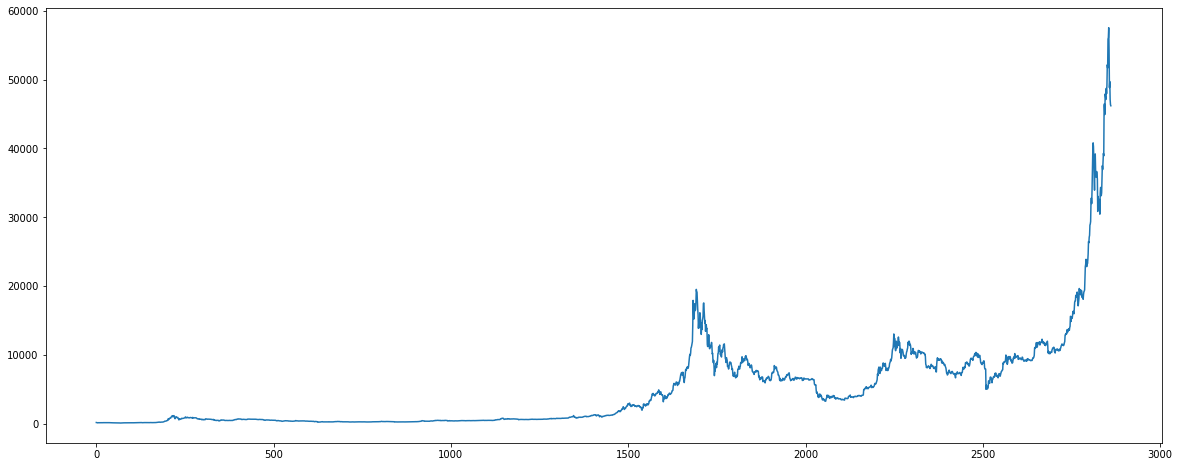

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
df['Close'].plot(x='Date', y='Close')
plt.show()

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

prediction_days = 10

x_train = []
y_train = []

for x in range(prediction_days,len(scaler_data)):
    x_train.append(scaler_data[x-prediction_days:x,0])
    y_train.append(scaler_data[x,0])

x_train, y_train = np.array(x_train),np.array(y_train)

x_train = x_train[:, :, np.newaxis]

#x_train = np.reshape(int(x_train), (x_train.shape[0],x_train[1],1))

In [93]:
x_test = x_train[2241:]
x_train = x_train[:2241]

print(x_train.shape)
print(x_test.shape)

(2241, 10, 1)
(611, 10, 1)


In [94]:
y_test = y_train[2241:]
y_train = y_train[:2241]

print(y_test.shape)
print(y_train.shape)

(611,)
(2241,)


In [95]:
scaler_data[x-5:x,0]

array([0.94201258, 0.84835066, 0.86367837, 0.81823881, 0.80511765])

In [96]:
y_train.shape

(2241,)

In [97]:
x_train.shape

(2241, 10, 1)

In [98]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(60,1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1)
  ])

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics= ['MAE'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 412,033
Trainable params: 412,033
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(x_train, y_train, batch_size= 64, validation_split = 0.2, epochs= 10)


Epoch 1/10
28/28 [==============================] - 6s 85ms/step - loss: 0.0013 - MAE: 0.0182 - val_loss: 1.1527e-04 - val_MAE: 0.0085
Epoch 2/10
28/28 [==============================] - 1s 45ms/step - loss: 1.1219e-04 - MAE: 0.0058 - val_loss: 1.2948e-04 - val_MAE: 0.0093
Epoch 3/10
28/28 [==============================] - 1s 46ms/step - loss: 1.0680e-04 - MAE: 0.0050 - val_loss: 1.0497e-04 - val_MAE: 0.0079
Epoch 4/10
28/28 [==============================] - 1s 44ms/step - loss: 8.6120e-05 - MAE: 0.0048 - val_loss: 1.3527e-04 - val_MAE: 0.0086
Epoch 5/10
28/28 [==============================] - 1s 44ms/step - loss: 7.8241e-05 - MAE: 0.0046 - val_loss: 8.5078e-05 - val_MAE: 0.0062
Epoch 6/10
28/28 [==============================] - 1s 44ms/step - loss: 1.0379e-04 - MAE: 0.0055 - val_loss: 8.3701e-05 - val_MAE: 0.0067
Epoch 7/10
28/28 [==============================] - 1s 44ms/step - loss: 6.2087e-05 - MAE: 0.0034 - val_loss: 1.9720e-04 - val_MAE: 0.0121
Epoch 8/10
28/28 [=============

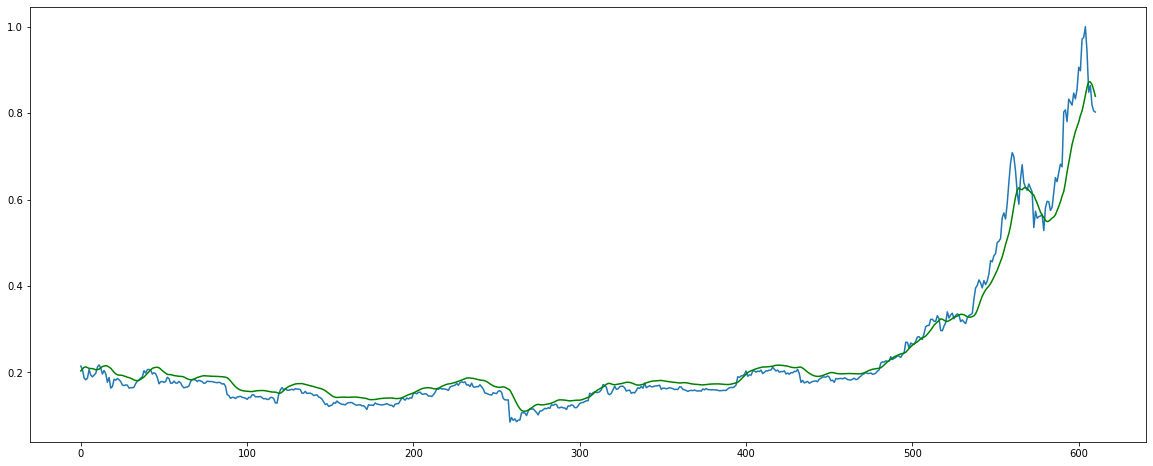

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

pred = model.predict(x_test)

plt.figure(figsize=(20,8))
plt.plot(y_test)
plt.plot(pred,color='green')
plt.show()